In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

# Import library

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

# Load data and visualize

In [7]:
all_data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [8]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [9]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/no

'1 no.jpeg'  '26 no.jpg'  '41 no.jpg'	 N15.jpg    No16.jpg	 'no 89.jpg'
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg    No17.jpg	 'no 9.png'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg    No18.jpg	 'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG    No19.jpg	 'no 91.jpeg'
'13 no.jpg'  '3 no.jpg'   '45 no.jpg'	 N2.JPG     No20.jpg	 'no 92.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG    No21.jpg	 'no 923.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg    No22.jpg	 'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG   'no 1.jpg'	 'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG   'no 10.jpg'	 'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '5 no.jpg'	 N3.jpg    'no 100.jpg'  'no 97.jpg'
'2 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N5.jpg    'no 2.jpg'	 'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '6 no.jpg'	 N6.jpg    'no 3.jpg'	 'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '7 no.jpg'	 No11.jpg  'no 4.jpg'	  no.jpg
'22 no.jpg'  '38 no.jpg'  '8 no.jpg'	 No12.jpg  'no 5.jpeg'
'2

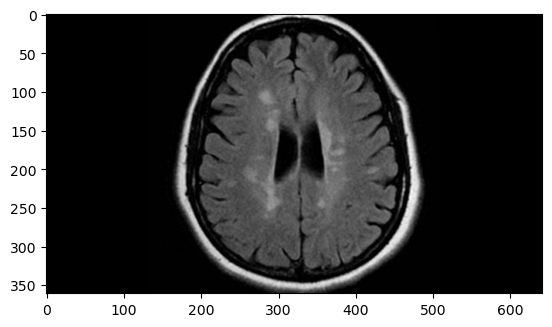

In [10]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 8.jpg")
plt.imshow(img)

In [11]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
img.shape

(361, 642, 3)

In [13]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (225, 225, 3)


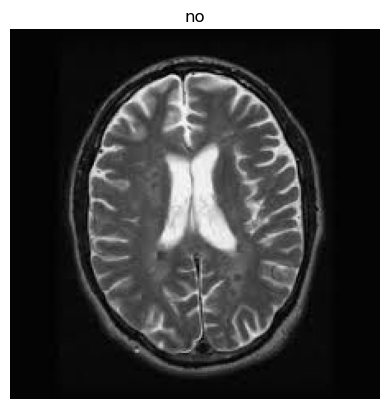

In [14]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="no")

Image shape: (315, 289, 3)


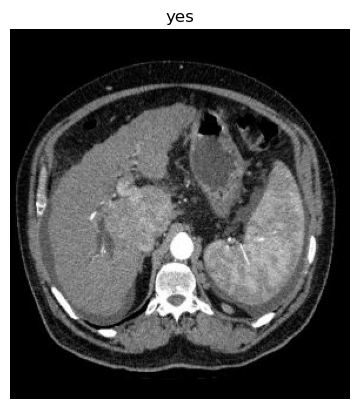

In [15]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="yes")

# Data preprocess

In [16]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [17]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [18]:
test_data

# CNN

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dropout(0.5),  # Dropout layer added
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.BatchNormalization(),  # BatchNormalization layer added
  tf.keras.layers.Dense(1, activation="sigmoid") 
])


In [20]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [21]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 61s 7s/step - loss: 0.7630 - accuracy: 0.6126 - val_loss: 3.3814 - val_accuracy: 0.6126
Epoch 2/50
8/8 [==============================] - 57s 7s/step - loss: 0.6681 - accuracy: 0.6640 - val_loss: 2.4744 - val_accuracy: 0.6126
Epoch 3/50
8/8 [==============================] - 57s 7s/step - loss: 0.6285 - accuracy: 0.6838 - val_loss: 1.7459 - val_accuracy: 0.6166
Epoch 4/50
8/8 [==============================] - 57s 7s/step - loss: 0.5851 - accuracy: 0.7036 - val_loss: 0.5988 - val_accuracy: 0.7747
Epoch 5/50
8/8 [==============================] - 57s 7s/step - loss: 0.5819 - accuracy: 0.7233 - val_loss: 0.5758 - val_accuracy: 0.7826
Epoch 6/50
8/8 [==============================] - 57s 7s/step - loss: 0.5285 - accuracy: 0.7470 - val_loss: 0.5513 - val_accuracy: 0.7668
Epoch 7/50
8/8 [==============================] - 58s 7s/step - loss: 0.5974 - accuracy: 0.6798 - val_loss: 0.7168 - val_accuracy: 0.7075
Epoch 8/50
8/8 [==================

In [22]:
model.evaluate(test_data)

8/8 [==============================] - 12s 1s/step - loss: 0.2221 - accuracy: 0.9051


[0.22213858366012573, 0.9051383137702942]

<AxesSubplot:>

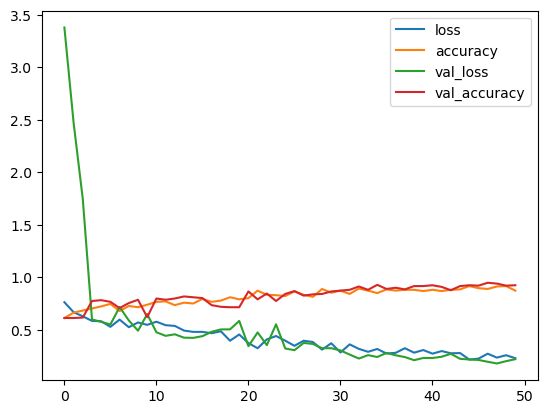

In [23]:
pd.DataFrame(model_history.history).plot()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [25]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

# Print the testing metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
 

8/8 [==============================] - 12s 1s/step - loss: 0.2485 - accuracy: 0.8893
Test Loss: 0.24846333265304565
Test Accuracy: 0.8893280625343323


In [37]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

test_images, test_labels = next(iter(test_data))
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).flatten()

test_labels = test_labels.astype(int)
predicted_labels = predicted_labels.astype(int)

precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 1s 1s/step
Precision: 0.8571428571428571
Recall: 1.0
F1 Score: 0.923076923076923
